In [1]:
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from fbprophet import Prophet as prt

# Data
## Importing the data

In [2]:
df = pd.read_csv('data/climdiv_national_year.csv')

In [3]:
df_temp = df.drop('temp', axis=1)

df_temp = df_temp.dropna()
df_temp.isnull().sum()

df_temp['year'] = pd.to_datetime(df_temp['year'].astype(str))
df_temp['year'] = df_temp['year'].dt.strftime('%Y-%m-%d')

df_temp_lbl = df_temp

df_temp = df_temp.set_index('year')

train, test = df_temp[0:-20], df_temp[-20::]

df_temp.head()

,tempc
year,
1895-01-01,10.187500
1896-01-01,11.107407
1897-01-01,10.864815
1898-01-01,10.795370
1899-01-01,10.560648


## Data cleaning

The provided data was already significanlty clean, thus no more steps were required.

## EDA

/home/robert/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tempc', ylabel='Density'>

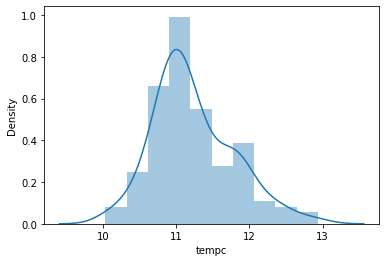

In [4]:
sns.distplot(df_temp['tempc'])

Text(0, 0.5, 'Temp [C]')

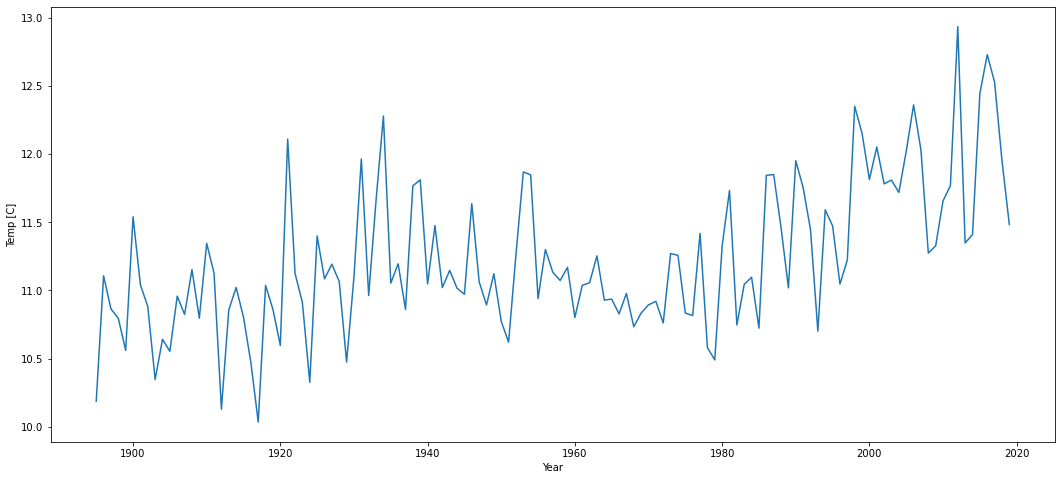

In [5]:
plt.figure(figsize=(18, 8))
plt.plot(df['year'], df['tempc'])
plt.xlabel('Year')
plt.ylabel('Temp [C]')

In [6]:
print(np.average(df['tempc']), np.std(df['tempc']))

11.231407407407408 0.5462242745996058


# Model selection
## FB Prophet model

In [7]:
df_temp

,tempc
year,
1895-01-01,10.187500
1896-01-01,11.107407
1897-01-01,10.864815
1898-01-01,10.795370
1899-01-01,10.560648
...,...
2015-01-01,12.445370
2016-01-01,12.730556
2017-01-01,12.528704


In [8]:
df_temp_lbl = df_temp_lbl.rename(columns = {'year': 'ds', 'tempc': 'y'})

df_temp_lbl.head()

,ds,y
0,1895-01-01,10.187500
1,1896-01-01,11.107407
2,1897-01-01,10.864815
3,1898-01-01,10.795370
4,1899-01-01,10.560648


In [9]:
model_temp = prt(yearly_seasonality=True)
model_temp.fit(df_temp_lbl)

future_temp = model_temp.make_future_dataframe(periods=6)
forecast_temp = model_temp.predict(future_temp)

forecast_temp

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1895-01-01,10.212694,10.353217,11.408112,10.212694,10.212694,0.643271,0.643271,0.643271,0.643271,0.643271,0.643271,0.0,0.0,0.0,10.855965
1,1896-01-01,10.220937,10.290612,11.352222,10.220937,10.220937,0.619270,0.619270,0.619270,0.619270,0.619270,0.619270,0.0,0.0,0.0,10.840206
2,1897-01-01,10.229202,10.362897,11.438406,10.229202,10.229202,0.689469,0.689469,0.689469,0.689469,0.689469,0.689469,0.0,0.0,0.0,10.918671
3,1898-01-01,10.237444,10.381126,11.424780,10.237444,10.237444,0.666680,0.666680,0.666680,0.666680,0.666680,0.666680,0.0,0.0,0.0,10.904124
4,1899-01-01,10.245686,10.341175,11.380116,10.245686,10.245686,0.643271,0.643271,0.643271,0.643271,0.643271,0.643271,0.0,0.0,0.0,10.888958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2019-01-03,11.512570,11.708184,12.785104,11.512570,11.512570,0.733075,0.733075,0.733075,0.733075,0.733075,0.733075,0.0,0.0,0.0,12.245645
127,2019-01-04,11.512629,11.825235,12.845417,11.512629,11.512629,0.811694,0.811694,0.811694,0.811694,0.811694,0.811694,0.0,0.0,0.0,12.324323
128,2019-01-05,11.512689,11.864907,12.913703,11.512689,11.512689,0.877645,0.877645,0.877645,0.877645,0.877645,0.877645,0.0,0.0,0.0,12.390335
129,2019-01-06,11.512749,11.889594,12.985215,11.512749,11.512749,0.929724,0.929724,0.929724,0.929724,0.929724,0.929724,0.0,0.0,0.0,12.442473


In [10]:
# The predicted dates for the next 15 steps are on a day value, these need to be transformed to the first of January for the years 2019-2025
ds_future = pd.to_datetime(['2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01'])

forecast_temp['ds'][-7:-1] = ds_future

forecast_temp.drop(forecast_temp.tail(1).index, inplace=True)

<ipython-input-10-d98e8cecd8c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_temp['ds'][-7:-1] = ds_future


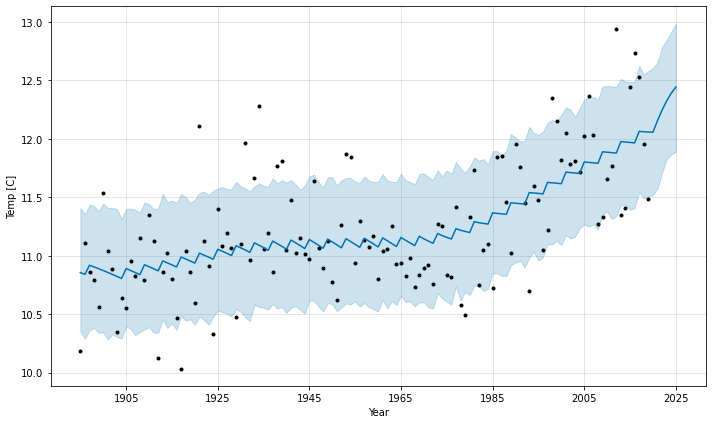

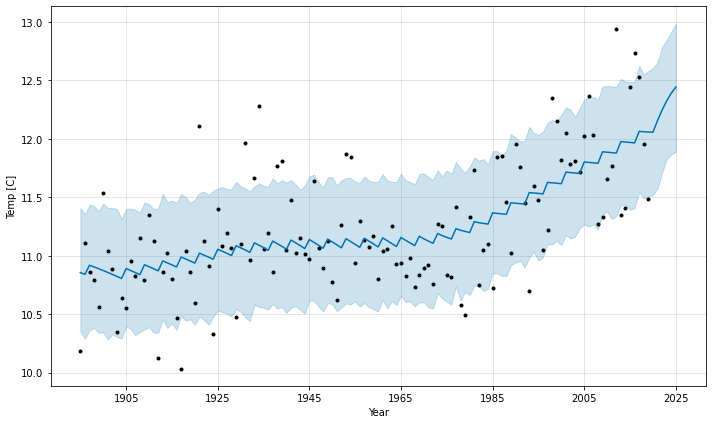

In [11]:
model_temp.plot(forecast_temp, xlabel='Year', ylabel='Temp [C]')

## LSTM model selection

In [12]:
# Importing the libraries needed for the  LSTM network
import tensorflow as tf
from tensorflow import keras

In [13]:
#Helper function that creates a matrix of time steps that lag behind the time series
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [14]:
time_steps = 10 #Using ten time steps
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.tempc, time_steps)
X_test, y_test = create_dataset(test, test.tempc, time_steps)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(95, 10, 1) (95,)
(10, 10, 1) (10,)


In [15]:
#Building a single layer LSTM sequential keras model, with 128 perceptrons
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])

In [16]:
#Building the model with 20 steps in a batch set and running for 1000 iterations 
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=20,
    validation_split=0.1,
    verbose=0,
    shuffle=False
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


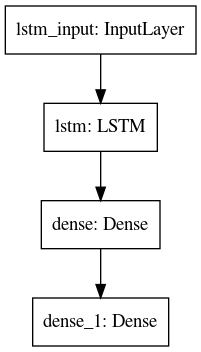

In [18]:
tf.keras.utils.plot_model(model)

In [19]:
# Making a prediction set, in the same time frame as the test data set
y_pred = model.predict(X_test)

In [20]:
y_pred

array([[11.211401],
       [11.254577],
       [11.271044],
       [11.430833],
       [11.229017],
       [11.224989],
       [11.366021],
       [11.415315],
       [11.399487],
       [11.327407]], dtype=float32)

In [21]:
pred_tempc = []
for i in range(20):
    pred_tempc.append(None)
    
pred_tempc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [22]:
test['pred_tempc'] = pred_tempc

for j in range(10):
    test['pred_tempc'][-j] = y_pred[-j]

<ipython-input-22-ec0c1dfbb687>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_tempc'] = pred_tempc
<ipython-input-22-ec0c1dfbb687>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_tempc'][-j] = y_pred[-j]
/home/robert/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(c

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

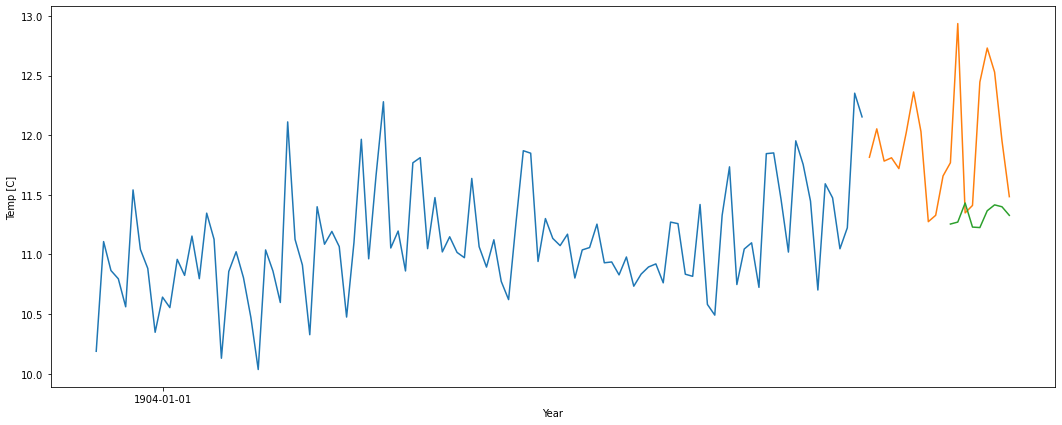

In [23]:
# PLotting the training, test, and predicted data set
plt.figure(figsize=(18,7))
plt.ylabel('Temp [C]')
plt.xlabel('Year')
plt.plot(train)
plt.plot(test)
plt.xticks(np.arange(min(train.tempc)-1, max(test.tempc)+1, 105))
plt.show()

In [24]:
test.tempc[-10:-1]

year
2010-01-01    11.657870
2011-01-01    11.768519
2012-01-01    12.935648
2013-01-01    11.348148
2014-01-01    11.410648
2015-01-01    12.445370
2016-01-01    12.730556
2017-01-01    12.528704
2018-01-01    11.954630
Name: tempc, dtype: float64

In [25]:
lstm_mse = ((test.tempc[-10:-1] - test.pred_tempc[-10:-1]) ** 2).mean()

print('The Mean Squared Error is {}'.format(lstm_mse))
print('The Root Mean Squared Error is {}'.format(np.sqrt(lstm_mse)))

The Mean Squared Error is [0.99674684]
The Root Mean Squared Error is [0.9983721]


## SARIMA time series model

In [39]:
# The timeseries is setup that the year serves as the index for the dataframe
df_temp = df.drop('temp', axis=1)
df_temp = df_temp.dropna()
df_temp.isnull().sum()
df_temp['year'] = pd.to_datetime(df_temp['year'].astype(str))
df_temp = df_temp.set_index('year')
df_temp

,tempc
year,
1895-01-01,10.187500
1896-01-01,11.107407
1897-01-01,10.864815
1898-01-01,10.795370
1899-01-01,10.560648
...,...
2015-01-01,12.445370
2016-01-01,12.730556
2017-01-01,12.528704


In [27]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm

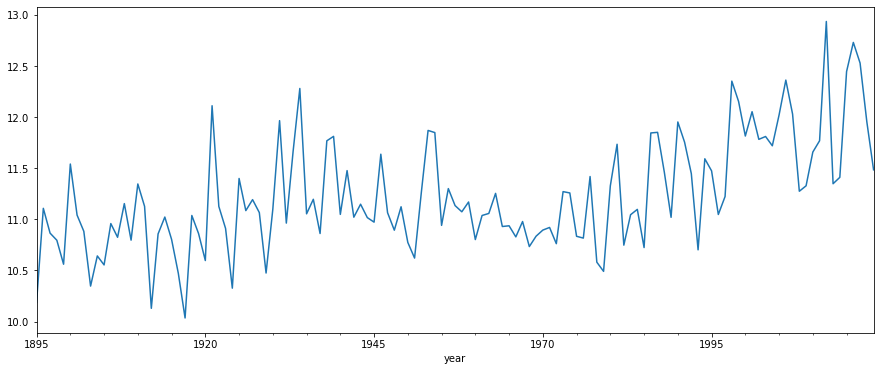

In [28]:
#The timeseries is smoothed using the yearly average
ts_year_avg = df_temp['tempc'].resample('YS').mean()

if len(ts_year_avg) == 1:
    delta = pd.Timedelta(days=1)
    lims = [ts_year_avg.index[0] - delta, ts_year_avg.index[0] + delta]
else:
    lims = [None, None]

ts_year_avg.plot(figsize = (15, 6), xlim=lims)
plt.show()

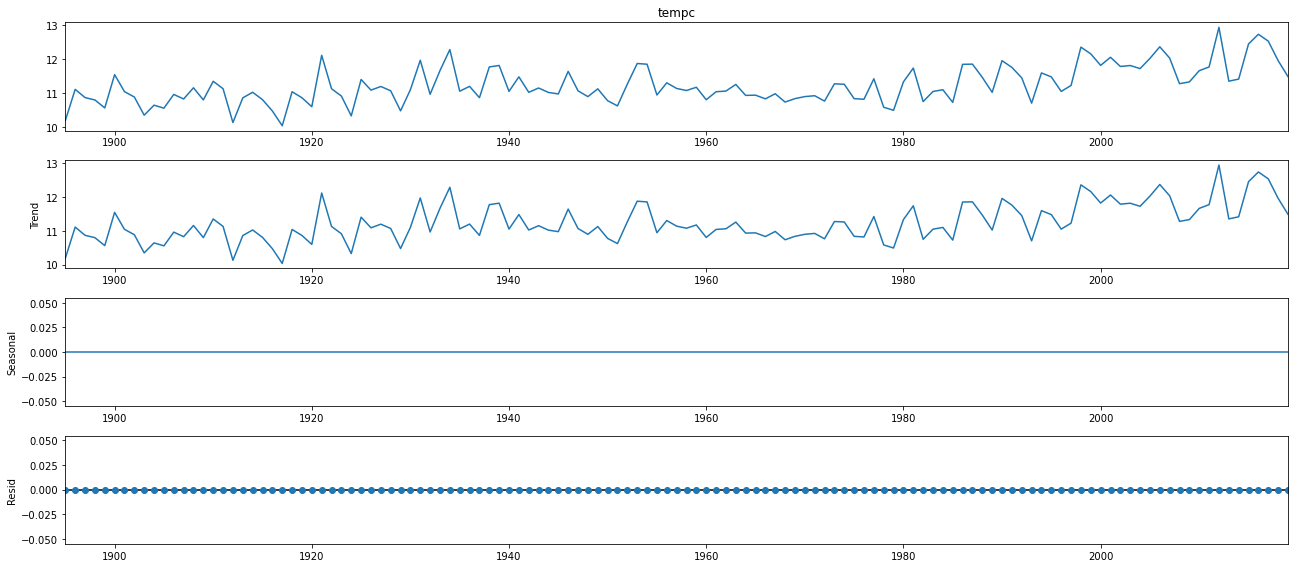

In [40]:
#The yearly seasonality is decomposed into the addidative componenets for the climate
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts_year_avg, model='additive')
fig = decomposition.plot()
plt.show()

In [42]:
#A Dicky-fuller test is done for 4 lagging values, one would expect a 4-5-, 11- and 22- year pattern. This is dues to the solar cycle's pattern chancing.
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(ts_year_avg))

Results of Dickey-Fuller Test:
Test Statistic                  -1.823928
p-value                          0.368649
#Lags Used                       4.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -1.823928
p-value                          0.368649
#Lags Used                       4.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64
None


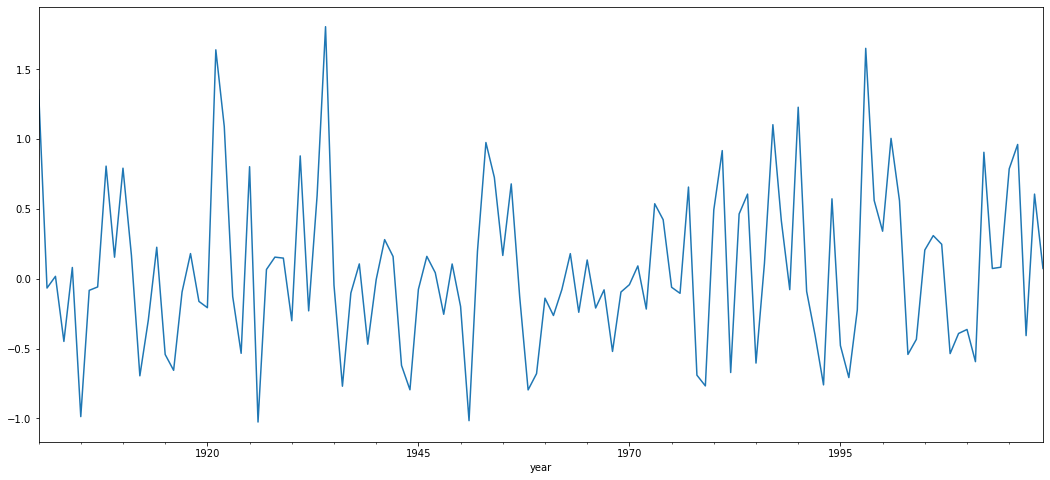

In [43]:
ts_t_adj = ts_year_avg - ts_year_avg.shift(5)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

print(adf_test(ts_year_avg))

<AxesSubplot:xlabel='year'>

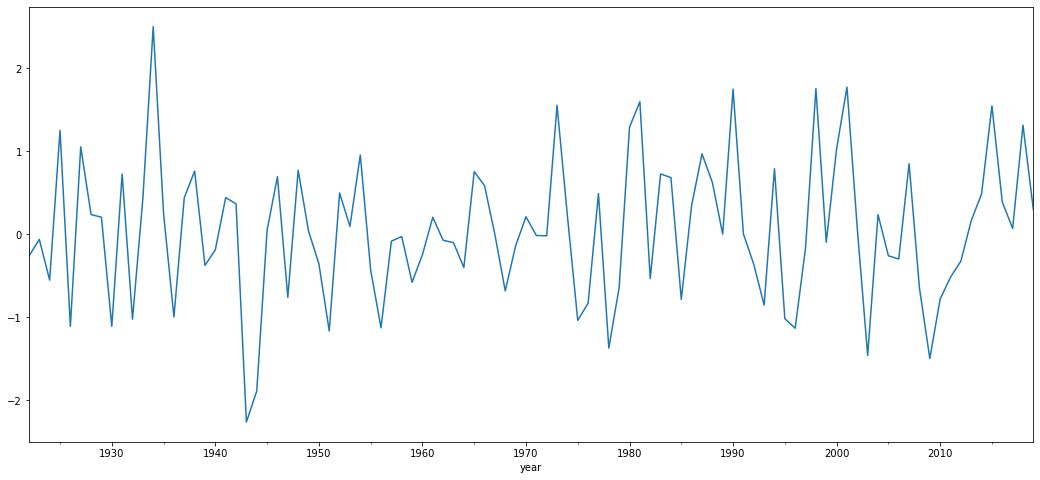

In [47]:
#With a flattened curve, or a curve not showing any more oscilationtions one would except that all seasonality effects were removed.
ts_s_adj = ts_t_adj - ts_t_adj.shift(22)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()

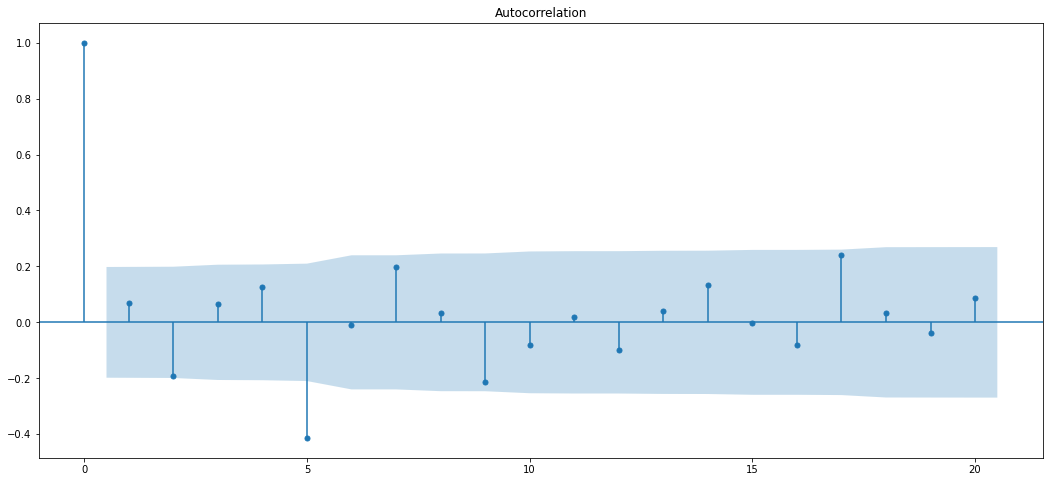

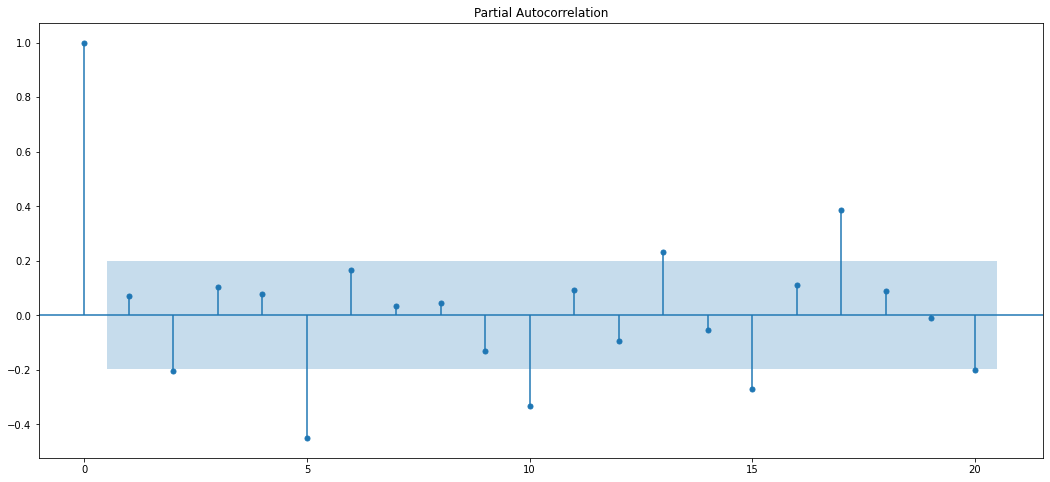

In [48]:
#The auto correlation test shows at what lagging instances there is a correlation within the time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_s_adj)
matplotlib.pyplot.show()
plot_pacf(ts_s_adj)
matplotlib.pyplot.show()

In [49]:
#The seasonal pdq matrix is constructed for the ARIMA model
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)


In [52]:
#The Seasonal maximum is calculated with the ARIMA model
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                order=(0, 1, 1),
                                seasonal_order=(2, 1, 0, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 1.272473
         Iterations: 4
         Function evaluations: 225
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     56.147     -0.018      0.986    -111.047     109.047
ar.S.L12      -0.8445      0.116     -7.299      0.000      -1.071      -0.618
ar.S.L24      -0.3820      0.124     -3.081      0.002      -0.625      -0.139
sigma2         0.9205     51.677      0.018      0.986    -100.365     102.206


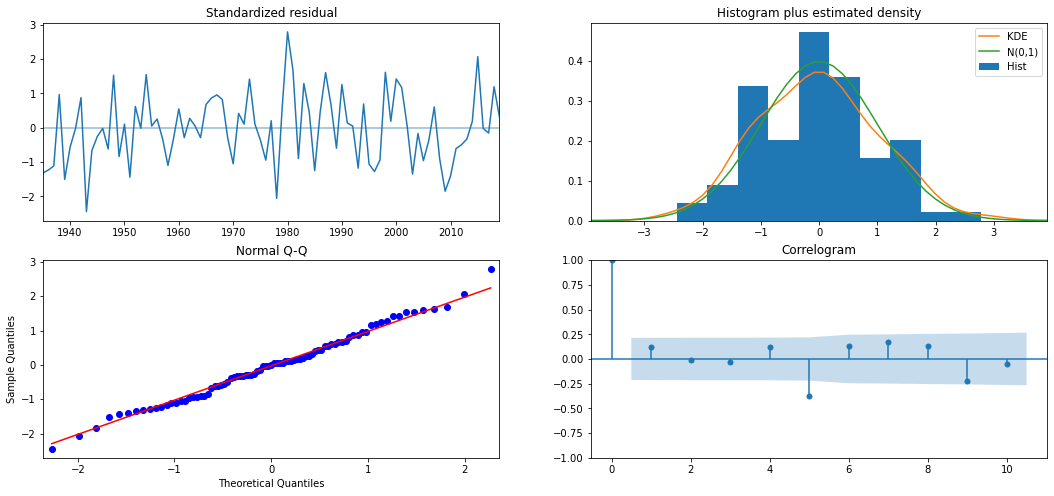

In [54]:
# The results of the model are measured with the residuals, and the distribution of the differences, being normal shows a good fit
results.plot_diagnostics(figsize=(18, 8))
plt.show()

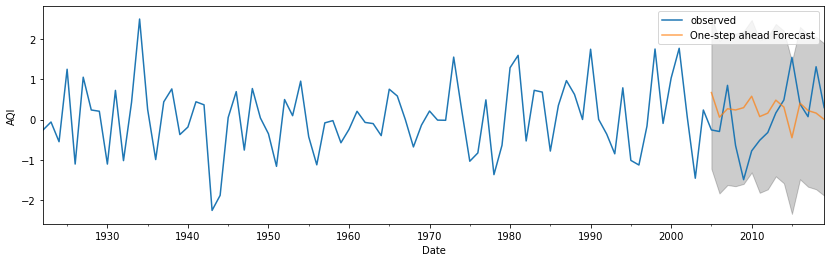

In [55]:
#The actual values of the test values, and the predicated values for the last entries in the time series are plotted with a one-step-forward method
pred = results.get_prediction(start=pd.to_datetime('2005-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_s_adj.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

In [56]:
y_forecasted = pred.predicted_mean
y_truth = ts_s_adj['2005-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 0.89
The Root Mean Squared Error is 0.94


# Comparison between different model metrics

In this data science capstone experiment, there were three experiments performed against each other.
- The first is a standard package, developed by the facebook data science team. This model is a convergance based model that finds the most opitmal solution, as a set of linear equation. This did show a strong upward trend for the for national climate of the continental united states.
- The second method that was test, was a simple tensorflow LSTM model. This is not as complex as one would use for stochastic sets such as climate change, but deep learning methods can get very complex very quickly - thus it was kept simple for this experiment's sake. The results were not as impressive as one would expect from a complex LSTM method, but it does take some time to properly train a deep learning method.
- The last method is a SARIMA model (Seasonality added to ARIMA), this does show a trend of the predicted values similar to what the test data shows. It indicates the best predictions, and a SARIMA method is actually more general for time line series data than other methods. It is easily debugable and maintainable. 

| Method | RMSE |
|--|--|
| FaceBook prophet | N/A |
| Tensorflow LSTM | ~0.98 |
| SARIMA | 0.88 |